# Import Statements

In [1]:
import numpy as np # for array and mathematical operations

import matplotlib.pyplot as plt #plotting library

import cv2 #solve computer vision problems.

import joblib # provide lightweight pipelining in Python

import pickle
# Pickle =  converting a Python object into a byte stream 
#to store it in a file/database, 
#maintain program state across sessions, or 
#transport data over the network.

import pandas as pd 
#for Data I/O, cleansing, transforming and aggregation
#used for data science/data analysis 
#and machine learning tasks

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
# work with figures

import plotly.express as px  
#provides online graphing, analytics, and statistics tools
# tool for data visualization and understanding  

In [2]:
#efficient tools for machine learning 
#and statistical modeling
#including classification, regression, clustering  dimensionality reduction.
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.preprocessing import label_binarize
import sklearn.metrics as metrics

In [3]:
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
#creates sparse matrices using multiple data structures
#converts a dense matrix to a sparse matrix

#csr_matrix: used in arithmetic operations

from sklearn.metrics import classification_report
#sklearn.metrics: measure classification performance.
# Classi_report: measure the quality of predictions from a classification algorithm

from skimage.feature import local_binary_pattern # for feature extracting
#skimage: package designed for image preprocessing


from sklearn import preprocessing
from sklearn.decomposition import PCA
#Decomposition = to project it to a lower dimensional space
#Principal Component Analysis (PCA) = 
#is a linear dimensionality reduction technique 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#used as dimensionality reduction technique in the pre-processing step

In [4]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
#GridSearchCV tries all the combinations of the values passed 
#in the dictionary and evaluates the model for each 
#combination using the Cross-Validation method.

from skimage.feature import hog

# Functions to be used

## Joblib for saving models

In [5]:
# Saving and Loading models using joblib 
def save(filename, obj):
    #The Save() function is used to save an array 
    #to a binary file in .npy format.
    
  with open(filename, 'wb') as handle:
      joblib.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with = used in exception handling 
#        to make the code cleaner and much more readable

#joblib = Joblib is such an pacakge that can simply turn our Python code into 
#parallel computing mode and 
#of course increase the computing speed.

#Dump =  used when the Python objects have to be stored in a file
#joblib.dump(value, filename, compress=0, protocol=None, cache_size=None)
def load(filename):
  with open(filename, 'rb') as handle:
      return joblib.load(filename)
#joblib.dump() and joblib.load() provide a replacement for pickle to work efficiently 
#on arbitrary Python objects containing large data, 
#in particular large numpy arrays.

## Saving the features and loading them
Python pickle module is used for serializing and de-serializing a Python object structure.Pickle = to save it on the disk
Pickle.dump(): takes 3 arguments <br>
#1. object to be stored <br>
#2. file object you get by opening the desired file in write-binary (wb) mode.<br>
#3. key-value argument. This argument defines the protocol.<br>

In [6]:
# functions to save and load the features 
def save_feature(feature, name):
  with open('cache/'+ name  + '.pkl','wb') as handle:
      pickle.dump(csr_matrix(feature), handle, protocol=pickle.HIGHEST_PROTOCOL)
  print(f'Feature saved with name cache/{name}.pkl')

def load_feature(feature_name):
  return pickle.load(open(feature_name, 'rb')).A

#pickle.load(): takes argument of 
# object that you get by opening the file in read-binary (rb) mode.

## Flattening of Image 

In [7]:
# Flatten = Transforming the image into a multi-dimensional array.
def flattened(images, color=cv2.COLOR_RGB2GRAY, name='flattened', save=False):
    color_images = [] #list
    if color is not None:
        for img in images:
            color_images.append(cv2.cvtColor(img, color)) 
            # appended colored images in the list
    else:
        color_images = images
    
    count = len(color_images)
    
    result = np.array(color_images).reshape(count, -1)
    # -1 = used when dimension is unknown, it gets calculated on it's own 
    
    if save:
        save_feature(result, name)
        
    return result

## Combining features of images

In [8]:
#It combines rows and columns extracted out of features of the images.
def combine_features(features, horizontal=True):
  
    if horizontal:
        return np.hstack(features)
    # hstack: stack arrays in sequence horizontally (column wise). 
    
    else: #vertical
        return np.vstack(features)
    #vstack() function is used to stack the sequence of input arrays 
    #vertically to make a single array

# Features Extraction functions

### HOG-Histogram of Oriented Gradients
Hog is used to extract features and edge directions from image data.<br>
Gradient & Orientations(G&O) are calculated using localized portions.<br>
Histograms are generated for each regions using G&O.<br>

In [9]:
def get_hog(images, name='hog', save=False):
    result = np.array([hog(img, block_norm='L2') for img in images])
    if save:
        save_feature(result, name)
    return result

### LBP-Local Binary Pattern
LBP is a local descriptor of the image based on the neighborhood for any given pixel. <br>
The neighborhood of a pixel is given in the form of P number of neighbors within a radius of R. <br>
It is a very powerful descriptor that detects all the possible edges in the image. <br>

In [10]:
def get_lbp(images, name='lbp', save=False):
  result = np.array([local_binary_pattern(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 10, 3).flatten() for img in images])
 
  if save:
      save_feature(result, name)
      
  return result

## Color Histogram

In [11]:
#Color Histogram = represents distribution of colors in an image.

In [12]:
def get_color_hist(images, name='color_hist', save=False):
    histograms = []
    for img in images:
        histograms.append(cv2.calcHist([img], [0, 1, 2],None, [8,8,8], [0, 256, 0, 256, 0, 256]).flatten())
    
    result = np.array(histograms)
    
    if save:
        save_feature(result, name)
        
    return result

## KAZE
KAZE Features is a novel 2D feature detection and description method that operates completely in a nonlinear scale space. Previous methods such as SIFT or SURF find features in the Gaussian scale space (particular instance of linear diffusion). However, Gaussian blurring does not respect the natural boundaries of objects and smoothes in the same degree details and noise when evolving the original image through the scale space.


In [13]:
def get_kaze(images, name='kaze', save=False):
    def get_image_kaze(image, vector_size=32):
        alg = cv2.KAZE_create()
        kps = alg.detect(image)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        
        # Making descriptor of same size
        # Descriptor vector size is 64
        needed_size = (vector_size * 64)
        if len(kps) == 0:
            return np.zeros(needed_size)
        
        kps, dsc = alg.compute(image, kps)
        dsc = dsc.flatten()
        
        if dsc.size < needed_size:
            # if we have less than 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
        return dsc
    
    # KAZE descriptor for all images
    features = []
    for i, img in enumerate(images):
        dsc = get_image_kaze(img)
        features.append(dsc)
    
    result = np.array(features)
    
    if save:
        save_feature(result, name)
        
    return result

## Functions to Normalize Features 

In [14]:
#Min-Max Normalisation
#For every feature, the minimum value of that feature gets transformed into a 0, 
#the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

In [15]:
def norm_features_minmax(train, test):
    min_max_scaler = preprocessing.MinMaxScaler()
    norm_train = min_max_scaler.fit_transform(train)
    norm_test = min_max_scaler.transform(test)
      
    return norm_train, norm_test

In [18]:
#Here Normalization is performed for validation set also

In [ ]:
def norm_features_minmax2(train,val,test):
    min_max_scaler = preprocessing.MinMaxScaler()
    norm_train = min_max_scaler.fit_transform(train)
    norm_val = min_max_scaler.transform(val)
    norm_test = min_max_scaler.transform(test)
     
    return norm_train,norm_val, norm_test

# Resizing Imgaes into 64x64

In [21]:
#Defining the path for dataset
images_path = "imgs/train"

In [22]:
#The below function reads the training dataset images, resizes them and saves them into two different variables:
#full_x, full_y

In [23]:
#def read_images(datapath):
#    labels = ['c0', 'c1','c2','c3','c4','c5','c6','c7','c8','c9']
#    mapping = {'c0' : 0, 'c1' :1, 'c2':2, 'c3':3, 'c4':4,'c5':5,'c6':6,'c7':7,'c8':8,'c9':9}
#    images = []
#    Imglabels = []
#    num1 = 64
#    num2 = 64
#    for label in labels:
#        path = os.path.join(datapath , label)
#        for img in os.listdir(path):
#            img = cv2.imread(os.path.join(path,img))
#            new_img = cv2.resize(img, (num2, num1))
#            images.append(new_img)
#            Imglabels.append(mapping[label])
#        print(images,Imglabels)
#    print(label)
#    return np.array(images), np.array(Imglabels)
   
#full_x , full_y  = read_images(images_path)


In [24]:
#save feature is used to save the resized images into the directory so that we don't need to resize them each time.
#this saves computation power.

In [25]:
#save("imgs/images_all_224.np", full_x)
#save("imgs/labels_all_224.np", full_y)

In [26]:
#Stratified splitting is used to split the dataset into 80:20 Training-Testing ratio. 
#The training dataset is further split into 90:10 Training-Validation set.
#We are commenting the code as once we have run it, we don't have to re run them as the file is already generated and saved using pickle

In [27]:
#full_x = load("imgs/images_all_224.np")
#full_y = load("imgs/labels_all_224.np")
#X , X_test , y ,y_test = train_test_split(full_x , full_y , test_size=0.2, random_state=0,stratify = full_y)
#train_imgs , val_imgs , train_y , val_y = train_test_split( X, y ,test_size=0.1, random_state=0,stratify = y) 

#np.save('data2/train_imgs.npy', train_imgs)
#np.save('data2/train_y.npy', train_y)
#np.save('data2/val_imgs.npy', val_imgs)
#np.save('data2/val_y.npy', val_y)

#np.save('data2/X.npy', X)
#np.save('data2/y.npy', y)
#np.save('data2/X_test.npy', X_test)
#np.save('data2/y_test.npy', y_test)

# Function for splitting the data

## Loading the data and splitting it

In [28]:
#Loading the data
full_x = load("imgs/images_all_224.np")
full_y = load("imgs/labels_all_224.np")

In [29]:
np.shape(full_x)#checking its dimensions

(22424, 64, 64, 3)

In [30]:
X , X_test , y ,y_test = train_test_split(full_x , full_y , test_size=0.2, random_state=0,stratify = full_y)#splitting the data in 80:20 ratio

In [31]:
X.shape  , X_test.shape , y.shape , y_test.shape 

((17939, 64, 64, 3), (4485, 64, 64, 3), (17939,), (4485,))

In [32]:
pd.DataFrame(y).value_counts()

0    1991
3    1877
4    1861
6    1860
2    1853
5    1849
1    1814
9    1703
7    1602
8    1529
dtype: int64

In [33]:
pd.DataFrame(y_test).value_counts()

0    498
3    469
6    465
4    465
2    464
5    463
1    453
9    426
7    400
8    382
dtype: int64

In [34]:
train_imgs , val_imgs , train_y , val_y = train_test_split( X, y ,test_size=0.1, random_state=0,stratify = y)#splitting the training data in 90:10 ratio

In [35]:
train_imgs.shape , val_imgs.shape , train_y.shape , val_y.shape 

((16145, 64, 64, 3), (1794, 64, 64, 3), (16145,), (1794,))

In [36]:
pd.DataFrame(train_y).value_counts()

0    1792
3    1689
4    1675
6    1674
2    1668
5    1664
1    1632
9    1533
7    1442
8    1376
dtype: int64

In [37]:
pd.DataFrame(val_y).value_counts()

0    199
3    188
6    186
4    186
5    185
2    185
1    182
9    170
7    160
8    153
dtype: int64

In [38]:
##Saving the training and testing splitted data

#np.save('data/train_imgs.npy', train_imgs)
#np.save('data/train_y.npy', train_y)
#np.save('data/val_imgs.npy', val_imgs)
#np.save('data/val_y.npy', val_y)

#np.save('data/X.npy', X)
#np.save('data/y.npy', y)
#np.save('data/X_test.npy', X_test)
#np.save('data/y_test.npy', y_test)

## Loading the data after splitting

In [11]:
train_imgs = np.load('data/train_imgs.npy')
train_y = np.load('data/train_y.npy')
val_imgs = np.load('data/val_imgs.npy')
val_y = np.load('data/val_y.npy')

X = np.load('data/X.npy')
y = np.load('data/y.npy')
X_test = np.load('data/X_test.npy')
y_test = np.load('data/y_test.npy')

In [22]:
X.shape  , X_test.shape , y.shape , y_test.shape 

((17939, 64, 64, 3), (4485, 64, 64, 3), (17939,), (4485,))

In [41]:
train_imgs.shape , val_imgs.shape , train_y.shape , val_y.shape 

((16145, 64, 64, 3), (1794, 64, 64, 3), (16145,), (1794,))

## Training the features and extracting it using an image

## HOG

In [45]:
#hog_train = get_hog(train_imgs, name='hog_train', save=True)
#hog_val = get_hog(val_imgs, name='hog_val', save=True)

Feature saved with name cache/hog_train.pkl
Feature saved with name cache/hog_val.pkl


In [22]:
hog_train = load_feature('cache/hog_train.pkl')
hog_val = load_feature('cache/hog_val.pkl')
hog_train.shape 

(16145, 2916)

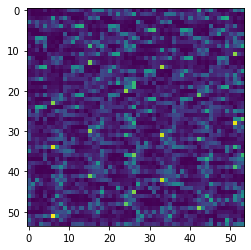

In [34]:
plt.imshow(hog_train[1].reshape(54,54))

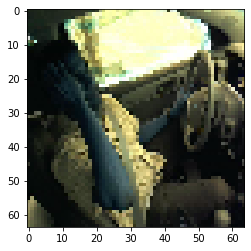

In [35]:
plt.imshow(train_imgs[1],cmap='gray', vmin=0, vmax=255)

### LBP Features 

In [48]:
#lbp_train = get_lbp(train_imgs, name='lbp_train', save=True)
#lbp_val = get_lbp(val_imgs, name='lbp_val', save=True)

Feature saved with name cache/lbp_train.pkl
Feature saved with name cache/lbp_val.pkl


In [23]:
lbp_train = load_feature('cache/lbp_train.pkl')
lbp_val = load_feature('cache/lbp_val.pkl')
lbp_train.shape 

(16145, 4096)

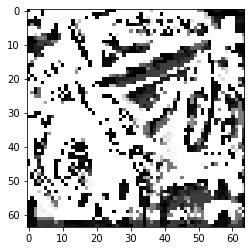

In [46]:
plt.imshow(lbp_train[1].reshape(64,64),cmap='gray', vmin=0, vmax=255)

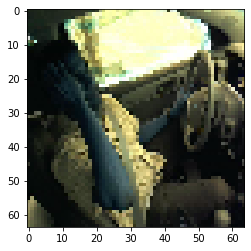

In [47]:
plt.imshow(train_imgs[1],cmap='gray', vmin=0, vmax=255)

### RGB 
In short, it is an additive model, in which shades of red, green and blue (hence the name) are added together in various proportions to reproduce a broad spectrum of colors.

In [52]:
#flat_rgb_train = flattened(train_imgs, None, name='flat_rgb_train', save=True)
#flat_rgb_val = flattened(val_imgs, None, name='flat_rgb_val', save=True)

Feature saved with name cache/flat_rgb_train.pkl
Feature saved with name cache/flat_rgb_val.pkl


In [24]:
flat_rgb_train = load_feature('cache/flat_rgb_train.pkl')
flat_rgb_val  = load_feature('cache/flat_rgb_val.pkl')

In [51]:
flat_rgb_train.shape , flat_rgb_val.shape 

((16145, 12288), (1794, 12288))

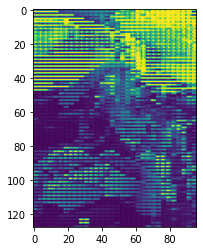

In [83]:
plt.imshow(flat_rgb_train[3].reshape(128,96))

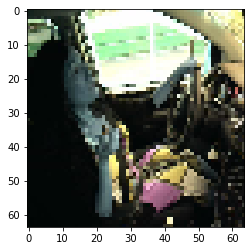

In [82]:
plt.imshow(train_imgs[3],cmap='gray', vmin=0, vmax=255)

### Gray 

In [53]:
#flat_gray_train = flattened(train_imgs, name='flat_gray_train', save=True)
#flat_gray_val = flattened(val_imgs, name='flat_gray_val', save=True)

Feature saved with name cache/flat_gray_train.pkl
Feature saved with name cache/flat_gray_val.pkl


In [25]:
flat_gray_train = load_feature('cache/flat_gray_train.pkl')
flat_gray_val = load_feature('cache/flat_gray_val.pkl')

In [56]:
flat_gray_train.shape, flat_gray_val.shape

((16145, 4096), (1794, 4096))

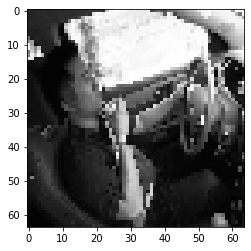

In [89]:
plt.imshow(flat_gray_train[4].reshape(64,64),cmap='gray')

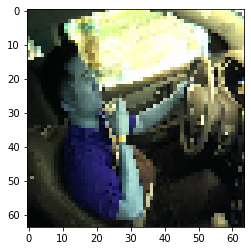

In [84]:
plt.imshow(train_imgs[4],cmap='gray', vmin=0, vmax=255)

## Color Histogram

In [54]:
#hist_train = get_color_hist(train_imgs, name='hist_train', save=False)
#hist_val = get_color_hist(val_imgs, name='hist_val', save=False)
#hist_test = get_color_hist(X_test, name='hist_val', save=False)

In [71]:
#np.save('cache/hist_test.npy', hist_test)
#np.save('cache/hist_train.npy', hist_train)
#np.save('cache/hist_val.npy', hist_val)

In [26]:
hist_train = np.load('cache/hist_train.npy')
hist_val = np.load('cache/hist_val.npy')
hist_test = np.load('cache/hist_test.npy')

In [73]:
hist_train.shape, hist_val.shape, hist_test.shape

((16145, 512), (1794, 512), (4485, 512))

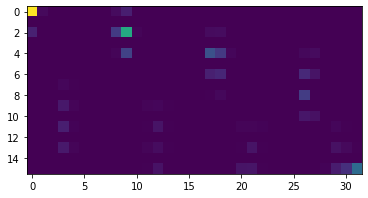

In [103]:
plt.imshow(hist_train[5].reshape(16,32))

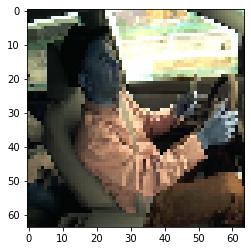

In [104]:
plt.imshow(train_imgs[5],cmap='gray', vmin=0, vmax=255)

## KAZE

In [55]:
#kaze_train = get_kaze(train_imgs, name='kaze_train', save=False)
#kaze_val = get_kaze(val_imgs, name='kaze_val', save=False)
#kaze_test = get_kaze(X_test, name='kaze_test', save=False)

In [106]:
#np.save('cache/kaze_test.npy', kaze_test)
#np.save('cache/kaze_train.npy', kaze_train)
#np.save('cache/kaze_val.npy', kaze_val)

In [27]:
kaze_train = np.load('cache/kaze_train.npy')
kaze_val = np.load('cache/kaze_val.npy')
kaze_test = np.load('cache/kaze_test.npy')

In [108]:
kaze_train.shape, kaze_val.shape, kaze_test.shape

((16145, 2048), (1794, 2048), (4485, 2048))

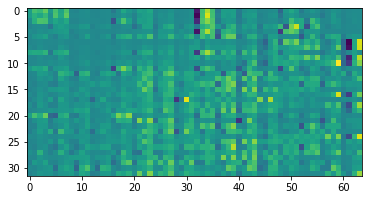

In [113]:
plt.imshow(kaze_train[6].reshape(32,64))

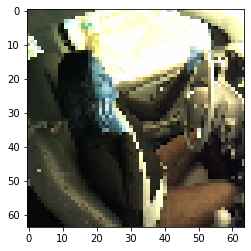

In [114]:
plt.imshow(train_imgs[6],cmap='gray', vmin=0, vmax=255)

# Dimensionality Reduction

## Reducing Features by PCA

### HOG

In [31]:
norm_hog_train, norm_hog_val = norm_features_minmax(hog_train, hog_val)

In [32]:
pca = PCA(n_components=100)
pca_hog_train = pca.fit_transform(norm_hog_train)
pca_hog_val = pca.transform(norm_hog_val)
#np.save('cache/pca_hog_train.npy', pca_hog_train)
#np.save('cache/pca_hog_val.npy', pca_hog_val)

In [33]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
px.area(
   x=range(1, exp_var_cumul.shape[0] + 1),
   y=exp_var_cumul,
   labels={"x": "# Components", "y": "Explained Variance"}
  )

In [29]:
pca_hog_train = np.load('cache/pca_hog_train.npy')
pca_hog_val = np.load('cache/pca_hog_val.npy')

### LBP

In [28]:
norm_lbp_train, norm_lbp_val = norm_features_minmax(lbp_train, lbp_val)

In [29]:
pca = PCA(n_components=100)
pca_lbp_train = pca.fit_transform(norm_lbp_train)
pca_lbp_val = pca.transform(norm_lbp_val)

In [30]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
px.area(
   x=range(1, exp_var_cumul.shape[0] + 1),
   y=exp_var_cumul,
   labels={"x": "# Components", "y": "Explained Variance"}
  )

In [64]:
#np.save('cache/pca_lbp_train.npy', pca_lbp_train)
#np.save('cache/pca_lbp_val.npy', pca_lbp_val)

In [30]:
pca_lbp_train = np.load('cache/pca_lbp_train.npy')
pca_lbp_val = np.load('cache/pca_lbp_val.npy')

In [47]:
print(np.shape(pca_lbp_train),np.shape(pca_lbp_val))

(16145, 100) (1794, 100)


### RGB

In [34]:
norm_rgb_train, norm_rgb_val = norm_features_minmax(flat_rgb_train, flat_rgb_val)

In [35]:
norm_rgb_train.shape

(16145, 12288)

In [36]:
pca = PCA(n_components=100)
pca_rgb_train = pca.fit_transform(norm_rgb_train)
pca_rgb_val = pca.transform(norm_rgb_val)

In [37]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [74]:
#np.save('cache/pca_rgb_train.npy', pca_rgb_train)
#np.save('cache/pca_rgb_val.npy', pca_rgb_val)

In [31]:
pca_rgb_train = np.load('cache/pca_rgb_train.npy')
pca_rgb_val = np.load('cache/pca_rgb_val.npy')

In [76]:
print(np.shape(pca_rgb_train),np.shape(pca_rgb_val))

(16145, 100) (1794, 100)


### Gray

In [38]:
norm_gray_train, norm_gray_val = norm_features_minmax(flat_gray_train, flat_gray_val)

In [39]:
pca = PCA(n_components=100)
pca_gray_train = pca.fit_transform(norm_gray_train)
pca_gray_val = pca.transform(norm_gray_val)

In [40]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [84]:
#np.save('cache/pca_gray_train.npy', pca_gray_train)
#np.save('cache/pca_gray_val.npy', pca_gray_val)

In [32]:
pca_gray_train = np.load('cache/pca_gray_train.npy')
pca_gray_val = np.load('cache/pca_gray_val.npy')

In [87]:
print(np.shape(pca_gray_train),np.shape(pca_gray_val))

(16145, 100) (1794, 100)


### KAZE

In [41]:
norm_kaze_train, norm_kaze_val, norm_kaze_test = norm_features_minmax2(kaze_train, kaze_val,kaze_test)

In [89]:
norm_kaze_train.shape, norm_kaze_val.shape, norm_kaze_test.shape

((16145, 2048), (1794, 2048), (4485, 2048))

In [42]:
pca = PCA(n_components=100)
pca_kaze_train = pca.fit_transform(norm_kaze_train)
pca_kaze_val = pca.transform(norm_kaze_val)
pca_kaze_test = pca.transform(norm_kaze_test)

In [91]:
#np.save('cache/pca_kaze_train.npy', pca_kaze_train)
#np.save('cache/pca_kaze_val.npy', pca_kaze_val)
#np.save('cache/pca_kaze_test.npy', pca_kaze_test)

In [33]:
pca_kaze_train =np.load('cache/pca_kaze_train.npy')
pca_kaze_val = np.load('cache/pca_kaze_val.npy')
pca_kaze_test = np.load('cache/pca_kaze_test.npy')

In [93]:
pca_kaze_train.shape, pca_kaze_val.shape, pca_kaze_test.shape

((16145, 100), (1794, 100), (4485, 100))

In [44]:
#PCA Plot
import plotly.express as px
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

### Color Histogram

In [45]:
norm_hist_train, norm_hist_val, norm_hist_test = norm_features_minmax2(hist_train, hist_val, hist_test)

In [46]:
pca_1 = PCA(n_components=100)
pca_color_hist_train = pca_1.fit_transform(norm_hist_train)
pca_color_hist_val = pca_1.transform(norm_hist_val)
pca_color_hist_test = pca_1.transform(norm_hist_test)

In [97]:
#np.save('cache/pca_color_hist_train.npy', pca_color_hist_train)
#np.save('cache/pca_color_hist_val.npy', pca_color_hist_val)
#np.save('cache/pca_color_hist_test.npy', pca_color_hist_test)

In [34]:
pca_color_hist_train = np.load('cache/pca_color_hist_train.npy')
pca_color_hist_val = np.load('cache/pca_color_hist_val.npy')
pca_color_hist_test = np.load('cache/pca_color_hist_test.npy')

In [47]:
exp_var_cumul = np.cumsum(pca_1.explained_variance_ratio_)
px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

## Reducing Features by LDA

### HOG

In [109]:
lda = LDA()
lda_hog_train = lda.fit_transform(norm_hog_train, train_y)
lda_hog_val = lda.transform(norm_hog_val)
#np.save('cache/lda_hog_train.npy', lda_hog_train)
#np.save('cache/lda_hog_val.npy', lda_hog_val)

In [110]:
#lda_hog_train.shape , lda_hog_val.shape  

((16145, 9), (1794, 9))

In [39]:
lda_hog_train = np.load('cache/lda_hog_train.npy')
lda_hog_val = np.load('cache/lda_hog_val.npy')

### LBP

In [104]:
#lda = LDA()
#lda_lbp_train = lda.fit_transform(norm_lbp_train, train_y)
#lda_lbp_val = lda.transform(norm_lbp_val)

In [105]:
#lda_lbp_train.shape , lda_lbp_val.shape  

((16145, 9), (1794, 9))

In [106]:
#np.save('cache/lda_lbp_train.npy', lda_lbp_train)
#np.save('cache/lda_lbp_val.npy', lda_lbp_val)

In [40]:
lda_lbp_train = np.load('cache/lda_lbp_train.npy')
lda_lbp_val = np.load('cache/lda_lbp_val.npy')

### RGB

In [25]:
#lda = LDA()
#lda_rgb_train = lda.fit_transform(norm_rgb_train, train_y)
#lda_rgb_val = lda.transform(norm_rgb_val)

In [27]:
lda_rgb_train.shape

(16145, 9)

In [26]:
#np.save('cache/lda_rgb_train.npy', lda_rgb_train)
#np.save('cache/lda_rgb_val.npy', lda_rgb_val)

In [41]:
lda_rgb_train = np.load('cache/lda_rgb_train.npy')
lda_rgb_val = np.load('cache/lda_rgb_val.npy')

### Color Histogram

In [32]:
lda = LDA()
lda_hist_train = lda.fit_transform(norm_hist_train, train_y)
lda_hist_val = lda.transform(norm_hist_val)
lda_hist_test = lda.transform(norm_hist_test)

In [33]:
#np.save('cache/lda_hist_train.npy', lda_hist_train)
#np.save('cache/lda_hist_val.npy', lda_hist_val)
#np.save('cache/lda_hist_test.npy', lda_hist_test)

In [42]:
lda_hist_train = np.load('cache/lda_hist_train.npy')
lda_hist_val = np.load('cache/lda_hist_val.npy')
lda_hist_test =  np.load('cache/lda_hist_test.npy')

In [34]:
lda_hist_train.shape, lda_hist_val.shape, lda_hist_test.shape

((16145, 9), (1794, 9), (4485, 9))

### KAZE

In [35]:
lda = LDA()
lda_kaze_train = lda.fit_transform(norm_kaze_train,train_y)
lda_kaze_val = lda.transform(norm_kaze_val)
lda_kaze_test = lda.transform(norm_kaze_test)

In [36]:
#np.save('cache/lda_kaze_train.npy', lda_kaze_train)
#np.save('cache/lda_kaze_val.npy', lda_kaze_val)
#np.save('cache/lda_kaze_test.npy', lda_kaze_test)

In [43]:
lda_kaze_train = np.load('cache/lda_kaze_train.npy')
lda_kaze_val = np.load('cache/lda_kaze_val.npy')
lda_kaze_test = np.load('cache/lda_kaze_test.npy')

In [37]:
lda_kaze_train.shape, lda_kaze_val.shape, lda_kaze_test.shape

((16145, 9), (1794, 9), (4485, 9))

## Reduce features on LDA using PCA

In [97]:
lda = LDA()
features_train_pca = np.load('cache/features_train_pca.npy')
features_val_pca = np.load('cache/features_val_pca.npy')
lda_pca_train = lda.fit_transform(features_train_pca, train_y)
lda_pca_val = lda.transform(features_val_pca)
#np.save('cache/lda_pca_train.npy', lda_pca_train)
#np.save('cache/lda_pca_val.npy', lda_pca_val)

# Loading the features

### HOG

In [43]:
hog_train = load_feature('cache/hog_train.pkl')
hog_val = load_feature('cache/hog_val.pkl')

pca_hog_train = np.load('cache/pca_hog_train.npy')
pca_hog_val = np.load('cache/pca_hog_val.npy')

lda_hog_train = np.load('cache/lda_hog_train.npy')
lda_hog_val = np.load('cache/lda_hog_val.npy')

In [44]:
hog_train.shape , hog_val.shape 

((16145, 2916), (1794, 2916))

In [45]:
pca_hog_train.shape ,pca_hog_val.shape

((16145, 100), (1794, 100))

In [46]:
lda_hog_train.shape , lda_hog_val.shape  

((16145, 9), (1794, 9))

### KAZE

In [54]:
kaze_train = np.load('cache/kaze_train.npy')
kaze_val = np.load('cache/kaze_val.npy')

pca_kaze_train = np.load('cache/pca_kaze_train.npy')
pca_kaze_val = np.load('cache/pca_kaze_val.npy')

lda_kaze_train = np.load('cache/lda_kaze_train.npy')
lda_kaze_val = np.load('cache/lda_kaze_val.npy')

In [55]:
kaze_train.shape , kaze_val.shape 

((16145, 2048), (1794, 2048))

In [56]:
pca_kaze_train.shape , pca_kaze_val.shape 

((16145, 100), (1794, 100))

In [57]:
lda_kaze_train.shape , lda_kaze_val.shape 

((16145, 9), (1794, 9))

### Color Histogram

In [61]:
hist_train = np.load('cache/hist_train.npy')
hist_val = np.load('cache/hist_val.npy')

pca_color_hist_train = np.load('cache/pca_color_hist_train.npy')
pca_color_hist_val = np.load('cache/pca_color_hist_val.npy')

lda_hist_train = np.load('cache/lda_hist_train.npy')
lda_hist_val = np.load('cache/lda_hist_val.npy')

In [62]:
hist_train.shape , hist_val.shape

((16145, 512), (1794, 512))

In [63]:
pca_color_hist_train.shape , pca_color_hist_val.shape 

((16145, 100), (1794, 100))

In [64]:
lda_hist_train.shape , lda_hist_val.shape 

((16145, 9), (1794, 9))

## Combine Features Normally

In [68]:
#features_train = None
#features_val = None

#for t, v in zip([hog_train, hist_train, flat_rgb_train, lbp_train, kaze_train], 
#                  [hog_val, hist_val, flat_rgb_val, lbp_val, kaze_val]):    

#    if features_train is None:
#        features_train = t
#        features_val = v
#    else:
#        features_train = combine_features([features_train, t])
#        features_val = combine_features([features_val, v])

In [69]:
#np.save('cache/features_train.npy', features_train)
#np.save('cache/features_val.npy', features_val)

In [70]:
features_train =  np.load('cache/features_train.npy')
features_val = np.load('cache/features_val.npy')

In [71]:
features_train.shape, features_val.shape

((16145, 21860), (1794, 21860))

## Combine Features on PCA

In [77]:
#features_train_pca = None
#features_val_pca = None

#for t, v in zip([pca_hog_train, pca_color_hist_train, pca_rgb_train, pca_lbp_train, pca_kaze_train], 
#                 [pca_hog_val, pca_color_hist_val, pca_rgb_val, pca_lbp_val, pca_kaze_val]):    

#    if features_train_pca is None:
#        features_train_pca = t
#        features_val_pca = v
#    else:
#        features_train_pca = combine_features([features_train_pca, t])
#        features_val_pca = combine_features([features_val_pca, v])

In [78]:
#np.save('cache/features_train_pca.npy', features_train_pca)
#np.save('cache/features_val_pca.npy', features_val_pca)

In [79]:
features_train_pca = np.load('cache/features_train_pca.npy')
features_val_pca = np.load('cache/features_val_pca.npy')

In [80]:
features_train_pca.shape, features_val_pca.shape

((16145, 500), (1794, 500))

## Combine Features on LDA

In [95]:
#features_train_lda = None
#features_val_lda = None

#for t, v in zip([lda_hog_train, lda_hist_train, lda_rgb_train, lda_lbp_train, lda_kaze_train], 
#                  [lda_hog_val, lda_hist_val, lda_rgb_val, lda_lbp_val, lda_kaze_val]):    

#    if features_train_lda is None:
#        features_train_lda = t
#        features_val_lda = v
#    else:
#        features_train_lda = combine_features([features_train_lda, t])
#        features_val_lda = combine_features([features_val_lda, v])

In [96]:
#np.save('cache/features_train_lda.npy', features_train_lda)
#np.save('cache/features_val_lda.npy', features_val_lda)

In [ ]:
features_train_lda = np.load('cache/features_train_lda.npy')
features_val_lda = np.load('cache/features_val_lda.npy')

# Features of Testing Data

In [23]:
X_test.shape , y_test.shape 

((4485, 64, 64, 3), (4485,))

In [24]:
#lbp_test = get_lbp(X_test, name='lbp_test', save=True)

Feature saved with name cache/lbp_test.pkl


In [25]:
lbp_test = load_feature('cache/lbp_test.pkl')

In [44]:
norm_lbp_train, norm_lbp_test = norm_features_minmax(lbp_train, lbp_test)

#pca = PCA(n_components=100)
#pca_lbp_train = pca.fit_transform(norm_lbp_train)
#pca_lbp_test = pca.transform(norm_lbp_test)

#np.save('cache/pca_lbp_test.npy', pca_lbp_test)

pca_lbp_test = np.load('cache/pca_lbp_test.npy')
pca_lbp_test.shape 

(4485, 100)

In [46]:
#test_imgs = X_test
#RGB
#flat_rgb_test = flattened(test_imgs, None, name='flat_rgb_test', save=True)
#flat_rgb_test = load_feature('cache/flat_rgb_test.pkl')

#norm_rgb_train, norm_rgb_test = norm_features_minmax(flat_rgb_train, flat_rgb_test)
#pca = PCA(n_components=100)
#pca_rgb_train = pca.fit_transform(norm_rgb_train)
#pca_rgb_test = pca.transform(norm_rgb_test)

#np.save('cache/pca_rgb_train.npy', pca_rgb_train)
#np.save('cache/pca_rgb_test.npy', pca_rgb_test)

pca_rgb_test = np.load('cache/pca_rgb_test.npy')

#GRAY
#flat_gray_test = flattened(test_imgs, name='flat_gray_test', save=True)
#flat_gray_test = load_feature('cache/flat_gray_test.pkl')

#norm_gray_train, norm_gray_test = norm_features_minmax(flat_gray_train, flat_gray_test)
#pca = PCA(n_components=100)
#x = pca.fit_transform(norm_gray_train)
#pca_gray_test = pca.transform(norm_gray_test)
#np.save('cache/pca_gray_test.npy', pca_gray_test)

pca_gray_test = np.load('cache/pca_gray_test.npy')

# Grid Search

### ADA

In [47]:
def apply_grid_search_ADA(features_train, train_y):
    grid_params = {'n_estimators': [50, 100, 200]}
    model = AdaBoostClassifier()

    grid_object = GridSearchCV(estimator=model, param_grid=grid_params, scoring='accuracy', n_jobs=-1, refit=True,
                               verbose=3)
    grid_object.fit(features_train, train_y)
    print(grid_object.best_estimator_)
    return grid_object

### KNN

In [9]:
def KNNGrid(X_train, y_train):
    classifier = KNeighborsClassifier()
    parameters = {'n_neighbors': [5, 51, 101]}
    clf = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', n_jobs=-1, verbose=3,
                       refit=True)
    clf.fit(X_train, y_train)
    best_accuracy = clf.best_score_
    best_parameters = clf.best_params_
    print("Best Accuracy: {:.2f} %".format(best_accuracy * 100))
    print("Best Parameters:", best_parameters)
    return clf

### Bagging

In [49]:
def BaggingGrid(X_train, y_train):
    classifier = BaggingClassifier(random_state=0)
    parameters = {'n_estimators': [10, 20, 40]}
    clf = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', n_jobs=-1, verbose=3,
                       refit=True)
    clf.fit(X_train, y_train)
    best_accuracy = clf.best_score_
    best_parameters = clf.best_params_
    print("Best Accuracy: {:.2f} %".format(best_accuracy * 100))
    print("Best Parameters:", best_parameters)
    return clf

### XgBoost

In [50]:
def XGBGrid(X_train, y_train):
    classifier = XGBClassifier()
    parameters = {'eta': [0.3, 0.4, 0.5], 'max_depth': [6, 8, 10]}
    clf = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', n_jobs=-1, verbose=3)
    clf.fit(X_train, y_train)
    best_accuracy = clf.best_score_
    best_parameters = clf.best_params_
    print("Best Accuracy: {:.2f} %".format(best_accuracy * 100))
    print("Best Parameters:", best_parameters)
    return clf

In [58]:
#y_train = np.load("data/train_y.npy")
#y_val = np.load('data/val_y.npy')
#features_train_pca = np.load('cache/features_train_pca.npy')
#features_val_pca = np.load('cache/features_val_pca.npy')
#features_train_lda = np.load('cache/features_train_lda.npy')
#features_val_lda = np.load('cache/features_val_lda.npy')
#lda_pca_train = np.load('cache/lda_pca_train.npy')
#lda_pca_val = np.load('cache/lda_pca_val.npy')

# Adaboost
ada_model = apply_grid_search_ADA(features_train_pca, y_train)
pickle.dump(ada_model, open('cache/ada_pca_model.pkl', 'wb'))
ada_model = pickle.load(open('cache/ada_pca_model.pkl', 'rb'))
print(ada_model)

# KNN
knn_model = KNNGrid(features_train_pca, y_train)
pickle.dump(knn_model, open('cache/knn_pca_model.pkl', 'wb'))
knn_model = pickle.load(open('cache/knn_pca_model.pkl', 'rb'))
print(knn_model)

# Bagging
bag_model = BaggingGrid(features_train_pca, y_train)
pickle.dump(bag_model, open('cache/bag_pca_model.pkl', 'wb'))
bag_model = pickle.load(open('cache/bag_pca_model.pkl', 'rb'))
print(bag_model)

# Xgboost
xgb_model = XGBGrid(features_train_pca, y_train)
pickle.dump(xgb_model, open('cache/xgb_pca_model.pkl', 'wb'))
xgb_model = pickle.load(open('cache/xgb_pca_model.pkl', 'rb'))
print(xgb_model)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  3.7min remaining:  5.6min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  8.2min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  9.2min finished


AdaBoostClassifier(n_estimators=200)
GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [50, 100, 200]}, scoring='accuracy',
             verbose=3)
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:   46.8s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  1.3min remaining:   19.2s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.4min finished


Best Accuracy: 98.78 %
Best Parameters: {'n_neighbors': 5}
GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 51, 101]}, scoring='accuracy',
             verbose=3)
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  3.9min remaining:  5.9min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  8.9min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 10.0min finished


Best Accuracy: 96.20 %
Best Parameters: {'n_estimators': 40}
GridSearchCV(estimator=BaggingClassifier(random_state=0), n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 40]}, scoring='accuracy',
             verbose=3)
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 101.7min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 222.2min finished
C:\Users\coola\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Accuracy: 98.68 %
Best Parameters: {'eta': 0.3, 'max_depth': 6}
GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_const

In [59]:
# Adaboost
ada_model = apply_grid_search_ADA(features_train_lda, y_train)
pickle.dump(ada_model, open('cache/ada_lda_model.pkl', 'wb'))
ada_model = pickle.load(open('cache/ada_lda_model.pkl', 'rb'))
print(ada_model)

# KNN
knn_model = KNNGrid(features_train_lda, y_train)
pickle.dump(knn_model, open('cache/knn_lda_model.pkl', 'wb'))
knn_model = pickle.load(open('cache/knn_lda_model.pkl', 'rb'))
print(knn_model)

# Bagging
bag_model = BaggingGrid(features_train_lda, y_train)
pickle.dump(bag_model, open('cache/bag_lda_model.pkl', 'wb'))
bag_model = pickle.load(open('cache/bag_lda_model.pkl', 'rb'))
print(bag_model)

# Xgboost
xgb_model = XGBGrid(features_train_lda, y_train)
pickle.dump(xgb_model, open('cache/xgb_lda_model.pkl', 'wb'))
xgb_model = pickle.load(open('cache/xgb_lda_model.pkl', 'rb'))
print(xgb_model)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:   20.7s remaining:   31.0s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   44.7s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   49.1s finished


AdaBoostClassifier(n_estimators=100)
GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [50, 100, 200]}, scoring='accuracy',
             verbose=3)
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    2.4s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    4.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.0s finished


Best Accuracy: 100.00 %
Best Parameters: {'n_neighbors': 5}
GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 51, 101]}, scoring='accuracy',
             verbose=3)
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    8.6s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   19.3s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   21.6s finished


Best Accuracy: 100.00 %
Best Parameters: {'n_estimators': 10}
GridSearchCV(estimator=BaggingClassifier(random_state=0), n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 40]}, scoring='accuracy',
             verbose=3)
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.1min finished
C:\Users\coola\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:04:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Accuracy: 100.00 %
Best Parameters: {'eta': 0.3, 'max_depth': 6}
GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_cons

In [62]:
# Adaboost
ada_model = apply_grid_search_ADA(lda_pca_train, y_train)
pickle.dump(ada_model, open('cache/ada_lda_on_pca_model.pkl', 'wb'))
ada_model = pickle.load(open('cache/ada_lda_on_pca_model.pkl', 'rb'))
print(ada_model)

# KNN
knn_model = KNNGrid(lda_pca_train, y_train)
pickle.dump(knn_model, open('cache/knn_lda_on_pca_model.pkl', 'wb'))
knn_model = pickle.load(open('cache/knn_lda_on_pca_model.pkl', 'rb'))
print(knn_model)

# Bagging
bag_model = BaggingGrid(lda_pca_train, y_train)
pickle.dump(bag_model, open('cache/bag_lda_on_pca_model.pkl', 'wb'))
bag_model = pickle.load(open('cache/bag_lda_on_pca_model.pkl', 'rb'))
print(bag_model)

# Xgboost
xgb_model = XGBGrid(lda_pca_train, y_train)
pickle.dump(xgb_model, open('cache/xgb_lda_on_pca_model.pkl', 'wb'))
xgb_model = pickle.load(open('cache/xgb_lda_on_pca_model.pkl', 'rb'))
print(xgb_model)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:   10.5s remaining:   15.8s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   19.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   21.3s finished


AdaBoostClassifier()
GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [50, 100, 200]}, scoring='accuracy',
             verbose=3)
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    2.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.7s finished


Best Accuracy: 98.30 %
Best Parameters: {'n_neighbors': 5}
GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 51, 101]}, scoring='accuracy',
             verbose=3)
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    5.5s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   11.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   12.9s finished


Best Accuracy: 97.60 %
Best Parameters: {'n_estimators': 40}
GridSearchCV(estimator=BaggingClassifier(random_state=0), n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 40]}, scoring='accuracy',
             verbose=3)
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.6min finished
C:\Users\coola\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:02:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Accuracy: 98.02 %
Best Parameters: {'eta': 0.5, 'max_depth': 6}
GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_const

# Model Analysis

In [63]:
def model_analysis(model_name='DT', feature='PCA', validation=None):
    """
    Possible model names: ['ADA','KNN','BAG', 'XGB']
    default = 'DT'

    Possible feature names: ['PCA','LDA','LDA_PCA']
    default = 'PCA'

    validation: (val_x, val_y) tupple for validation accuracy score.

    """
    model = None
    if model_name == 'ADA':
        if feature == 'LDA':
            model = pickle.load(open('cache/ada_lda_model.pkl', 'rb'))
        elif feature == 'LDA_PCA':
            model = pickle.load(open('cache/ada_lda_on_pca_model.pkl', 'rb'))
        else:
            model = pickle.load(open('cache/ada_pca_model.pkl', 'rb'))
    elif model_name == 'KNN':
        if feature == 'LDA':
            model = pickle.load(open('cache/knn_lda_model.pkl', 'rb'))
        elif feature == 'LDA_PCA':
            model = pickle.load(open('cache/knn_lda_on_pca_model.pkl', 'rb'))
        else:
            model = pickle.load(open('cache/knn_pca_model.pkl', 'rb'))
    elif model_name == 'BAG':
        if feature == 'LDA':
            model = pickle.load(open('cache/bag_lda_model.pkl', 'rb'))
        elif feature == 'LDA_PCA':
            model = pickle.load(open('cache/bag_lda_on_pca_model.pkl', 'rb'))
        else:
            model = pickle.load(open('cache/bag_pca_model.pkl', 'rb'))
    else:
        if feature == 'LDA':
            model = pickle.load(open('cache/xgb_lda_model.pkl', 'rb'))
        elif feature == 'LDA_PCA':
            model = pickle.load(open('cache/xgb_lda_on_pca_model.pkl', 'rb'))
        else:
            model = pickle.load(open('cache/xgb_pca_model.pkl', 'rb'))

    if validation is not None:
        target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7',
                        'class 8', 'class 9', ]
        y_hat = model.predict(validation[0])
        class_report = classification_report(validation[1], y_hat, target_names=target_names, output_dict=True)
        print('Precision =', class_report['macro avg']['precision'])
        print('Recall = ', class_report['macro avg']['recall'])
        print('F1-score =', class_report['macro avg']['f1-score'])
        print('Accuracy =', class_report['accuracy'])

In [64]:
y_train = np.load('data/train_y.npy')
y_val = np.load('data/val_y.npy')
features_train_pca = np.load('cache/features_train_pca.npy')
features_val_pca = np.load('cache/features_val_pca.npy')
features_train_lda = np.load('cache/features_train_lda.npy')
features_val_lda = np.load('cache/features_val_lda.npy')
lda_pca_train = np.load('cache/lda_pca_train.npy')
lda_pca_val = np.load('cache/lda_pca_val.npy')

# AdaBoost
model_analysis(model_name='ADA', feature='PCA', validation=(features_val_pca, y_val))
model_analysis(model_name='ADA', feature='LDA', validation=(features_val_lda, y_val))
model_analysis(model_name='ADA', feature='LDA_PCA', validation=(lda_pca_val, y_val))

# KNN
model_analysis(model_name='KNN', feature='PCA', validation=(features_val_pca, y_val))
model_analysis(model_name='KNN', feature='LDA', validation=(features_val_lda, y_val))
model_analysis(model_name='KNN', feature='LDA_PCA', validation=(lda_pca_val, y_val))

# Bagging
model_analysis(model_name='BAG', feature='PCA', validation=(features_val_pca, y_val))
model_analysis(model_name='BAG', feature='LDA', validation=(features_val_lda, y_val))
model_analysis(model_name='BAG', feature='LDA_PCA', validation=(lda_pca_val, y_val))

# XGB
model_analysis(model_name='XGB', feature='PCA', validation=(features_val_pca, y_val))
model_analysis(model_name='XGB', feature='LDA', validation=(features_val_lda, y_val))
model_analysis(model_name='XGB', feature='LDA_PCA', validation=(lda_pca_val, y_val))

Precision = 0.6926765736206548
Recall =  0.6636101601494954
F1-score = 0.6716380487254424
Accuracy = 0.664994425863991
Precision = 0.32092930576968515
Recall =  0.42617936515512067
F1-score = 0.34403919855510834
Accuracy = 0.4358974358974359
Precision = 0.5810957028882491
Recall =  0.6092076056712051
F1-score = 0.5611111308320775
Accuracy = 0.6081382385730212


C:\Users\coola\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\coola\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision = 0.9935949234527686
Recall =  0.9935153670900758
F1-score = 0.9935073650470125
Accuracy = 0.9933110367892977
Precision = 0.9965734237650746
Recall =  0.9965769077901431
F1-score = 0.9965570282605392
Accuracy = 0.9966555183946488
Precision = 0.9761733204386023
Recall =  0.9756086882437467
F1-score = 0.9758538565453805
Accuracy = 0.9760312151616499
Precision = 0.9654413888179286
Recall =  0.9641983022602263
F1-score = 0.9646739210238865
Accuracy = 0.9648829431438127
Precision = 0.8606088780215417
Recall =  0.8334138669909903
F1-score = 0.8354875959851951
Accuracy = 0.8394648829431438
Precision = 0.9663582550537108
Recall =  0.9665275328799069
F1-score = 0.9663206326954713
Accuracy = 0.9665551839464883
Precision = 0.9901215092278447
Recall =  0.9900291153022135
F1-score = 0.9900343953800107
Accuracy = 0.9899665551839465
Precision = 0.8060159607160063
Recall =  0.7917344321519134
F1-score = 0.795991294587806
Accuracy = 0.7948717948717948
Precision = 0.9698671659482173
Recall =  

# Plotting the score


### ROC Curve

In [76]:
def roc(y_test, prob):
    class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    y = label_binarize(y_test, classes=class_labels)
    n_classes = y.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y[:, i], prob[:, i])
        roc_auc[i] = metrics.roc_auc_score(y[:, i], prob[:, i])

    # Compute micro-average ROC curve and ROC area
    fpr["avg"], tpr["avg"], _ = metrics.roc_curve(y.ravel(), prob.ravel())
    roc_auc["avg"] = metrics.auc(fpr["avg"], tpr["avg"])

    return fpr, tpr, roc_auc

## Visualization for PCA

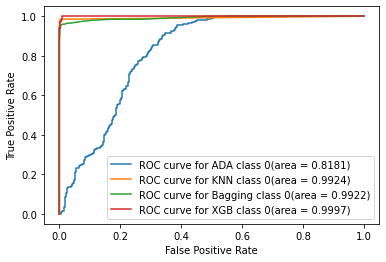

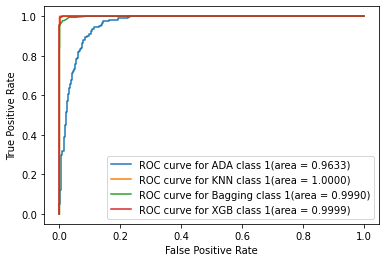

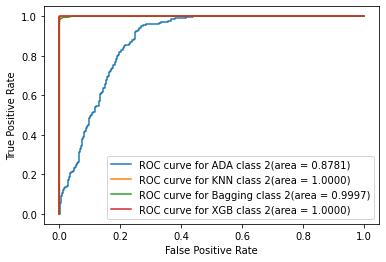

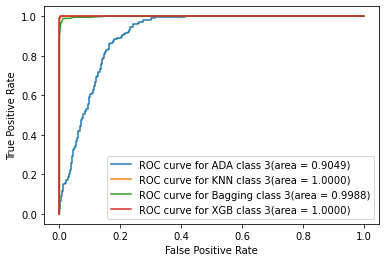

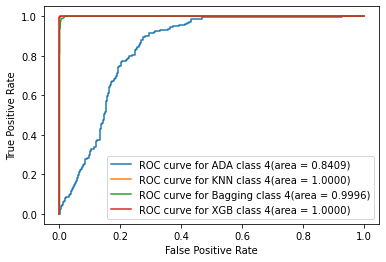

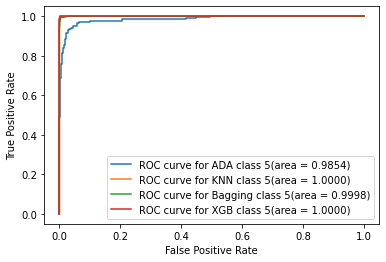

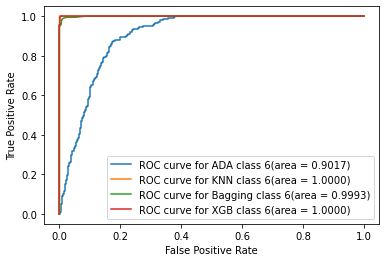

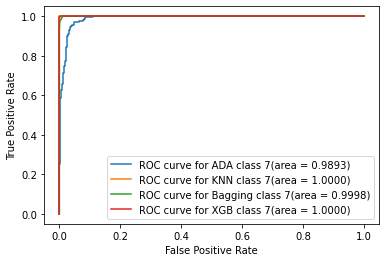

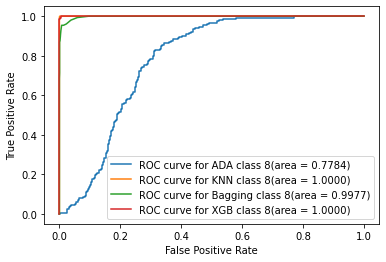

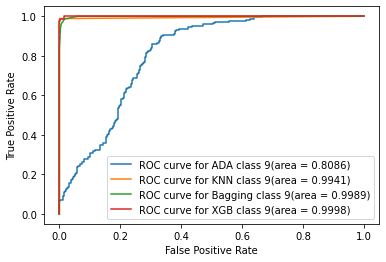

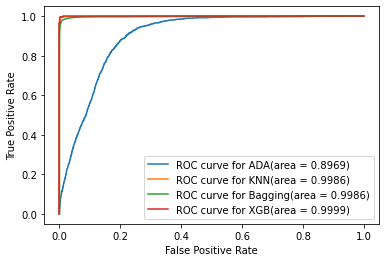

In [77]:
class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
name_arr = ['ADA', 'KNN', 'Bagging', 'XGB']

# Adaboost
model1 = pickle.load(open('cache/ada_pca_model.pkl', 'rb'))
prob1 = model1.predict_proba(features_val_pca)

# KNN
model2 = pickle.load(open('cache/knn_pca_model.pkl', 'rb'))
prob2 = model2.predict_proba(features_val_pca)

# Bagging
model3 = pickle.load(open('cache/bag_pca_model.pkl', 'rb'))
prob3 = model3.predict_proba(features_val_pca)

# Xgboost
model4 = pickle.load(open('cache/xgb_pca_model.pkl', 'rb'))
prob4 = model4.predict_proba(features_val_pca)

fpr1, tpr1, auc_roc1 = roc(y_val, prob1)
fpr2, tpr2, auc_roc2 = roc(y_val, prob2)
fpr3, tpr3, auc_roc3 = roc(y_val, prob3)
fpr4, tpr4, auc_roc4 = roc(y_val, prob4)

# For each class
for i in range(10):
    plt.plot(fpr1[i],tpr1[i],label='ROC curve for '+str(name_arr[0])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                ''.format(auc_roc1[i]))
    plt.plot(fpr2[i],tpr2[i],label='ROC curve for '+str(name_arr[1])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                ''.format(auc_roc2[i]))
    plt.plot(fpr3[i],tpr3[i],label='ROC curve for '+str(name_arr[2])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                ''.format(auc_roc3[i]))
    plt.plot(fpr4[i],tpr4[i],label='ROC curve for '+str(name_arr[3])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                ''.format(auc_roc4[i]))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Average ROC scores
plt.plot(fpr1["avg"], tpr1["avg"], label='ROC curve for ' + str(name_arr[0]) + '(area = {:.4f})'
                                                                              ''.format(auc_roc1["avg"]))

plt.plot(fpr2["avg"], tpr2["avg"], label='ROC curve for ' + str(name_arr[1]) + '(area = {:.4f})'
                                                                              ''.format(auc_roc2["avg"]))

plt.plot(fpr3["avg"], tpr3["avg"], label='ROC curve for ' + str(name_arr[2]) + '(area = {:.4f})'
                                                                              ''.format(auc_roc3["avg"]))

plt.plot(fpr4["avg"], tpr4["avg"], label='ROC curve for ' + str(name_arr[3]) + '(area = {:.4f})'
                                                                              ''.format(auc_roc4["avg"]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Visualization on LDA

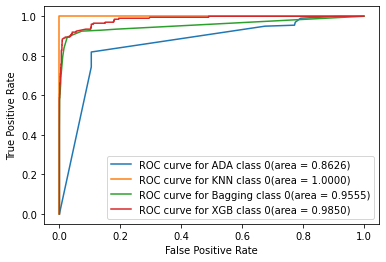

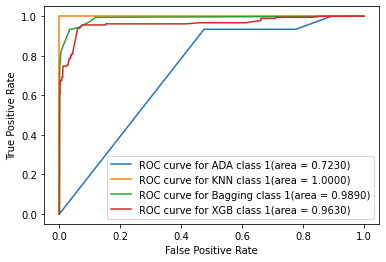

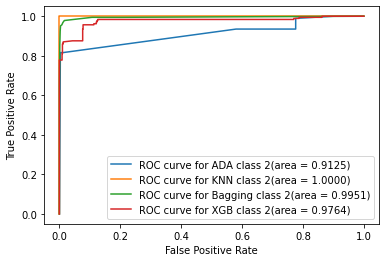

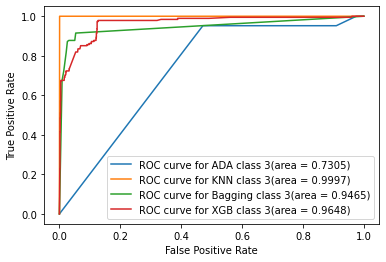

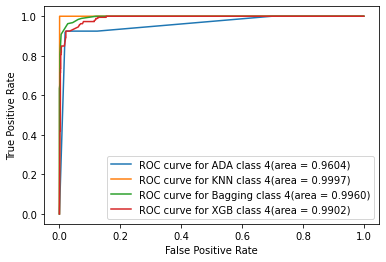

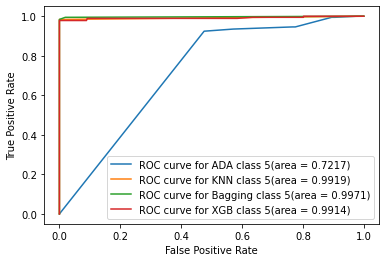

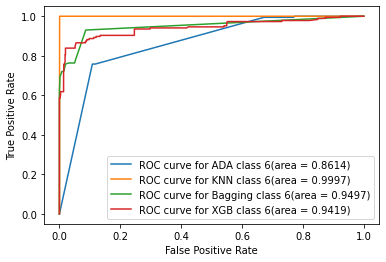

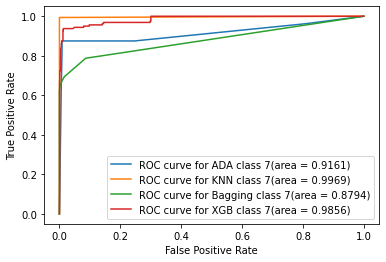

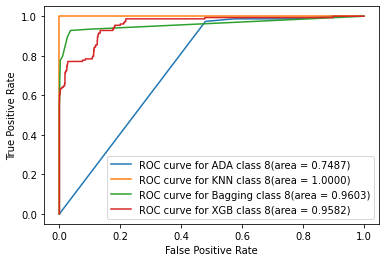

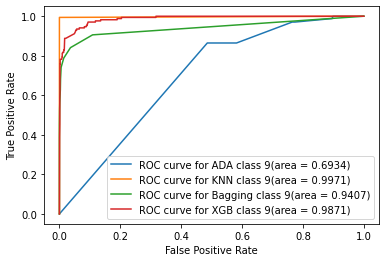

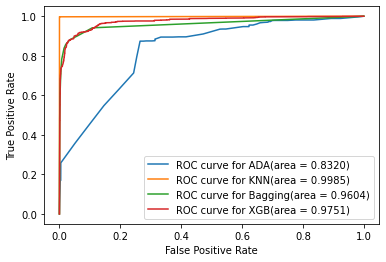

In [79]:
class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
name_arr = ['ADA', 'KNN', 'Bagging', 'XGB']

# Adaboost
model1 = pickle.load(open('cache/ada_lda_model.pkl', 'rb'))
prob1 = model1.predict_proba(features_val_lda)

# KNN
model2 = pickle.load(open('cache/knn_lda_model.pkl', 'rb'))
prob2 = model2.predict_proba(features_val_lda)

# Bagging
model3 = pickle.load(open('cache/bag_lda_model.pkl', 'rb'))
prob3 = model3.predict_proba(features_val_lda)

# Xgboost
model4 = pickle.load(open('cache/xgb_lda_model.pkl', 'rb'))
prob4 = model4.predict_proba(features_val_lda)

fpr1, tpr1, auc_roc1 = roc(y_val, prob1)
fpr2, tpr2, auc_roc2 = roc(y_val, prob2)
fpr3, tpr3, auc_roc3 = roc(y_val, prob3)
fpr4, tpr4, auc_roc4 = roc(y_val, prob4)

# For each class
for i in range(10):
    plt.plot(fpr1[i],tpr1[i],label='ROC curve for '+str(name_arr[0])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                ''.format(auc_roc1[i]))
    plt.plot(fpr2[i],tpr2[i],label='ROC curve for '+str(name_arr[1])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                ''.format(auc_roc2[i]))
    plt.plot(fpr3[i],tpr3[i],label='ROC curve for '+str(name_arr[2])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                ''.format(auc_roc3[i]))
    plt.plot(fpr4[i],tpr4[i],label='ROC curve for '+str(name_arr[3])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                ''.format(auc_roc4[i]))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Average ROC scores
plt.plot(fpr1["avg"], tpr1["avg"], label='ROC curve for ' + str(name_arr[0]) + '(area = {:.4f})'
                                                                              ''.format(auc_roc1["avg"]))

plt.plot(fpr2["avg"], tpr2["avg"], label='ROC curve for ' + str(name_arr[1]) + '(area = {:.4f})'
                                                                              ''.format(auc_roc2["avg"]))

plt.plot(fpr3["avg"], tpr3["avg"], label='ROC curve for ' + str(name_arr[2]) + '(area = {:.4f})'
                                                                              ''.format(auc_roc3["avg"]))

plt.plot(fpr4["avg"], tpr4["avg"], label='ROC curve for ' + str(name_arr[3]) + '(area = {:.4f})'
                                                                              ''.format(auc_roc4["avg"]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Visualization on LDA over PCA

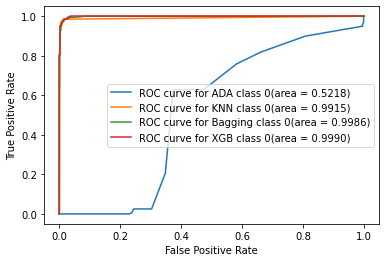

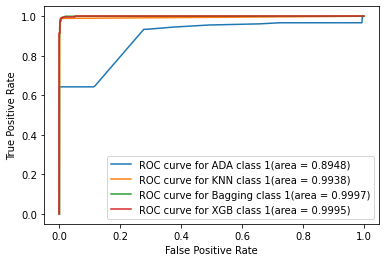

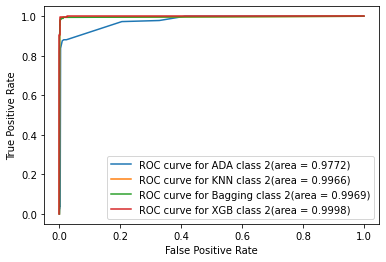

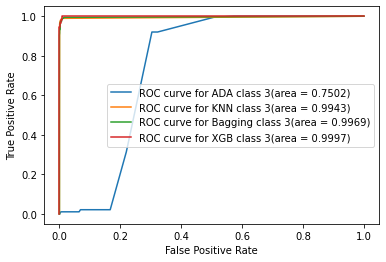

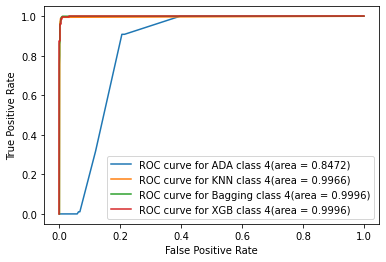

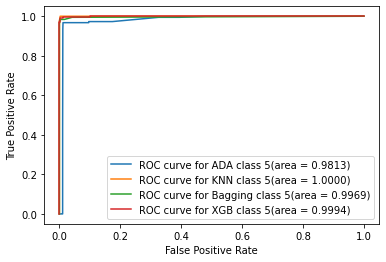

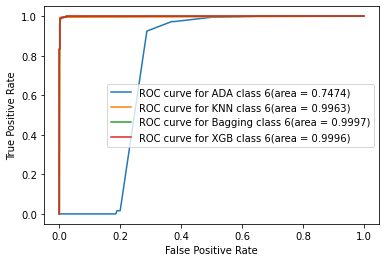

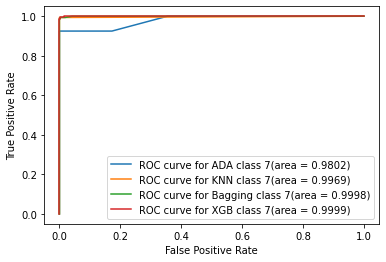

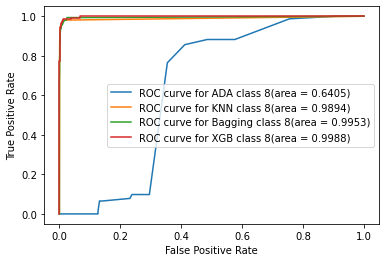

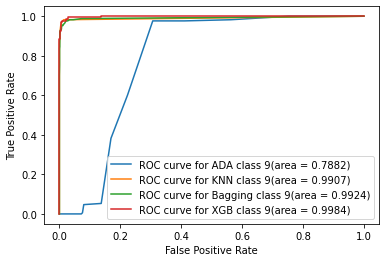

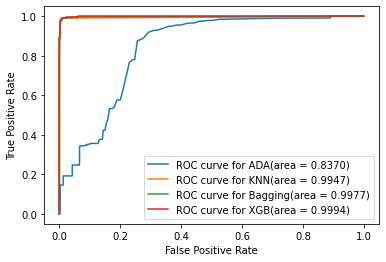

In [80]:
class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
name_arr = ['ADA', 'KNN', 'Bagging', 'XGB']

# Adaboost
model1 = pickle.load(open('cache/ada_lda_on_pca_model.pkl', 'rb'))
prob1 = model1.predict_proba(lda_pca_val)

# KNN
model2 = pickle.load(open('cache/knn_lda_on_pca_model.pkl', 'rb'))
prob2 = model2.predict_proba(lda_pca_val)

# Bagging
model3 = pickle.load(open('cache/bag_lda_on_pca_model.pkl', 'rb'))
prob3 = model3.predict_proba(lda_pca_val)

# Xgboost
model4 = pickle.load(open('cache/xgb_lda_on_pca_model.pkl', 'rb'))
prob4 = model4.predict_proba(lda_pca_val)

fpr1, tpr1, auc_roc1 = roc(y_val, prob1)
fpr2, tpr2, auc_roc2 = roc(y_val, prob2)
fpr3, tpr3, auc_roc3 = roc(y_val, prob3)
fpr4, tpr4, auc_roc4 = roc(y_val, prob4)

# For each class
for i in range(10):
    plt.plot(fpr1[i],tpr1[i],label='ROC curve for '+str(name_arr[0])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                ''.format(auc_roc1[i]))
    plt.plot(fpr2[i],tpr2[i],label='ROC curve for '+str(name_arr[1])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                ''.format(auc_roc2[i]))
    plt.plot(fpr3[i],tpr3[i],label='ROC curve for '+str(name_arr[2])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                ''.format(auc_roc3[i]))
    plt.plot(fpr4[i],tpr4[i],label='ROC curve for '+str(name_arr[3])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                ''.format(auc_roc4[i]))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Average ROC scores
plt.plot(fpr1["avg"], tpr1["avg"], label='ROC curve for ' + str(name_arr[0]) + '(area = {:.4f})'
                                                                              ''.format(auc_roc1["avg"]))

plt.plot(fpr2["avg"], tpr2["avg"], label='ROC curve for ' + str(name_arr[1]) + '(area = {:.4f})'
                                                                              ''.format(auc_roc2["avg"]))

plt.plot(fpr3["avg"], tpr3["avg"], label='ROC curve for ' + str(name_arr[2]) + '(area = {:.4f})'
                                                                              ''.format(auc_roc3["avg"]))

plt.plot(fpr4["avg"], tpr4["avg"], label='ROC curve for ' + str(name_arr[3]) + '(area = {:.4f})'
                                                                              ''.format(auc_roc4["avg"]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Combining Test Data

In [87]:
#PCA
features_train_pca = None
features_test_pca = None 
for t, v in zip([pca_hog_train, pca_color_hist_train, pca_rgb_train, pca_lbp_train, pca_kaze_train,
                  pca_gray_train], [pca_hog_val, pca_color_hist_val, pca_rgb_val, pca_lbp_val, pca_kaze_val, pca_gray_val]):

        if features_train_pca is None:
            features_train_pca = t
            features_test_pca = v
        else:
            features_train_pca = combine_features([features_train_pca, t])
            features_test_pca = combine_features([features_test_pca, v])

np.save('cache/features_test_pca.npy', features_test_pca)

#LDA
features_train_lda = None
features_test_lda = None
for t, v in zip([lda_hog_train, lda_hist_train, lda_rgb_train, lda_lbp_train, lda_kaze_train
                  ], [lda_hog_val, lda_hist_val, lda_rgb_val, lda_lbp_val, lda_kaze_val]):

        if features_train_lda is None:
            features_train_lda = t
            features_test_lda = v
        else:
            features_train_lda = combine_features([features_train_lda, t])
            features_test_lda = combine_features([features_test_lda, v])

np.save('cache/features_test_lda.npy', features_test_lda)


In [8]:
def train_model(train_x, train_y, model_name='DT', validation=None):
    """
    Possible model names: ['SVM', 'ADA','KNN','BAG', 'XGB', 'DT']
    default = 'DT'

    validation: (val_x, val_y) tupple for validation accuracy score.

    """
    model = None
    if model_name == 'SVM':
         model = svm.SVC(C=10, kernel='rbf', probability=True)
    elif model_name == 'XGB':
         model = XGBClassifier(eta=0.5, max_depth=6)
    elif model_name == 'KNN':
         model = KNeighborsClassifier(n_neighbors=5)
    elif model_name == 'ADA':
         model = AdaBoostClassifier(n_estimators=200)
    elif model_name == 'BAG':
         model = BaggingClassifier(n_estimators=40)
    else:
         model = DecisionTreeClassifier(criterion='entropy', max_depth=20)
        
    
    model.fit(train_x, train_y)
    
    if validation is not None:
        target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7',
                         'class 8', 'class 9', ]
        y_hat = model.predict(validation[0])
        class_report = classification_report(validation[1], y_hat, target_names=target_names, output_dict=True)
        print('Precision =', class_report['macro avg']['precision'])
        print('Recall = ', class_report['macro avg']['recall'])
        print('F1-score =', class_report['macro avg']['f1-score'])
        print('Accuracy =', class_report['accuracy'])
               
    return model

In [13]:
features_train_pca = np.load('cache/features_train_pca.npy')
features_test_pca = np.load('cache/features_test_pca.npy')
features_train_pca.shape, features_test_pca.shape 
print(features_train_pca.shape, features_test_pca.shape)
comp_model = train_model(features_train_pca, train_y, model_name='KNN')
pickle.dump(comp_model, open('cache/final_model_1.pkl', 'wb'))
y_hat = comp_model.predict(features_test_pca)
np.save('cache/final_predictions_2.npy', y_hat)
acc = metrics.accuracy_score(val_y, y_hat)
print(acc*100)

(16145, 500) (1794, 500)
99.27536231884058


In [14]:
features_train_lda = np.load('cache/features_train_lda.npy')
features_test_lda = np.load('cache/features_test_lda.npy')
features_train_lda.shape, features_test_lda.shape 
print(features_train_lda.shape, features_test_lda.shape)
comp_model = train_model(features_train_lda, train_y, model_name='KNN')
pickle.dump(comp_model, open('cache/final_model_2.pkl', 'wb'))
y_hat = comp_model.predict(features_test_lda)
np.save('cache/final_predictions_2.npy', y_hat)
acc = metrics.accuracy_score(val_y, y_hat)
print(acc*100)

(16145, 45) (1794, 45)
99.66555183946488


In [12]:
lda_pca_train = np.load('cache/lda_pca_train.npy')
lda_pca_val = np.load('cache/lda_pca_val.npy')
print(lda_pca_train.shape, lda_pca_val.shape)
comp_model = train_model(lda_pca_train, train_y, model_name='KNN')
pickle.dump(comp_model, open('cache/final_model_3.pkl', 'wb'))
y_hat = comp_model.predict(lda_pca_val)
np.save('cache/final_predictions_3.npy', y_hat)
acc = metrics.accuracy_score(val_y, y_hat)
print(acc*100)

(16145, 9) (1794, 9)
97.60312151616499
